In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
duplicate_rows = df[df.duplicated()]
number_of_duplicates = len(duplicate_rows)
print(number_of_duplicates)


0


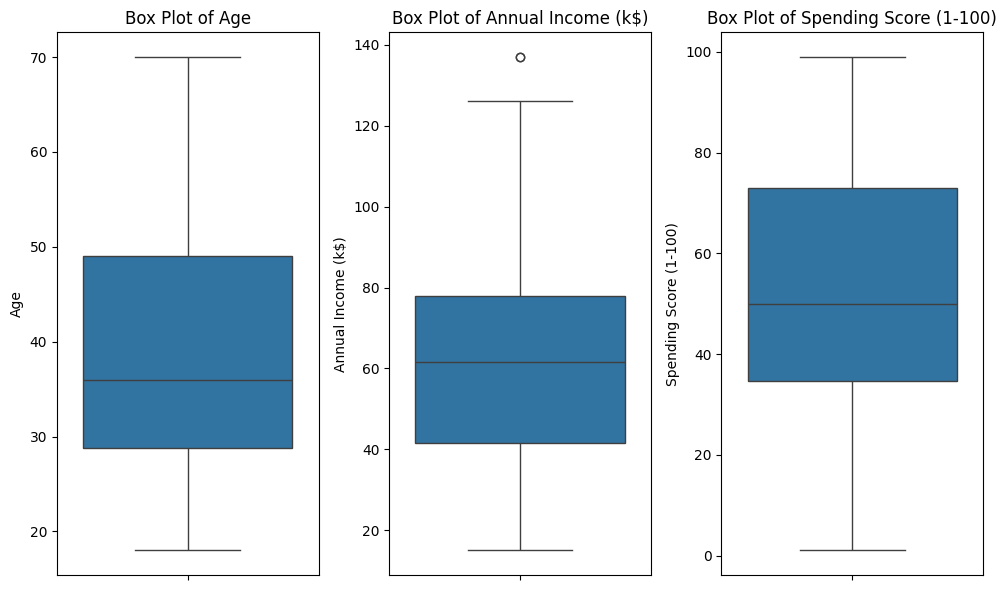

In [5]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

plt.figure(figsize=(20, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 6, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [6]:
df=df.copy()
for col in columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col + '_outlier'] = df[col].apply(lambda x: x < lower_bound or x > upper_bound)
        print(f"Number of outliers in {col}: {df[col + '_outlier'].sum()}")

Number of outliers in Age: 0
Number of outliers in Annual Income (k$): 2
Number of outliers in Spending Score (1-100): 0


In [7]:
outlier_col = 'Annual Income (k$)'
df_cleaned = df[(df[outlier_col] >= lower_bound) & (df[outlier_col] <= upper_bound)]


print(f"Number of rows before cleaning: {df.shape[0]}")
print(f"Number of rows after cleaning: {df_cleaned.shape[0]}")

Number of rows before cleaning: 200
Number of rows after cleaning: 198


In [8]:
df=df_cleaned
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_outlier,Annual Income (k$)_outlier,Spending Score (1-100)_outlier
0,1,Male,19,15,39,False,False,False
1,2,Male,21,15,81,False,False,False
2,3,Female,20,16,6,False,False,False
3,4,Female,23,16,77,False,False,False
4,5,Female,31,17,40,False,False,False
...,...,...,...,...,...,...,...,...
193,194,Female,38,113,91,False,False,False
194,195,Female,47,120,16,False,False,False
195,196,Female,35,120,79,False,False,False
196,197,Female,45,126,28,False,False,False


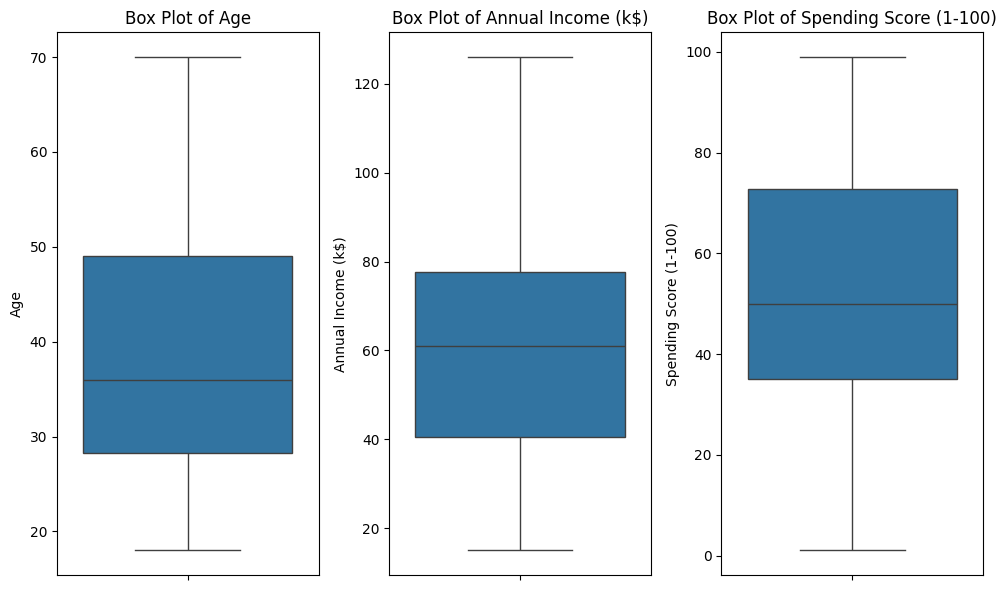

In [9]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

plt.figure(figsize=(20, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 6, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000            0.004406               -0.329421
Annual Income (k$)      0.004406            1.000000                0.010080
Spending Score (1-100) -0.329421            0.010080                1.000000


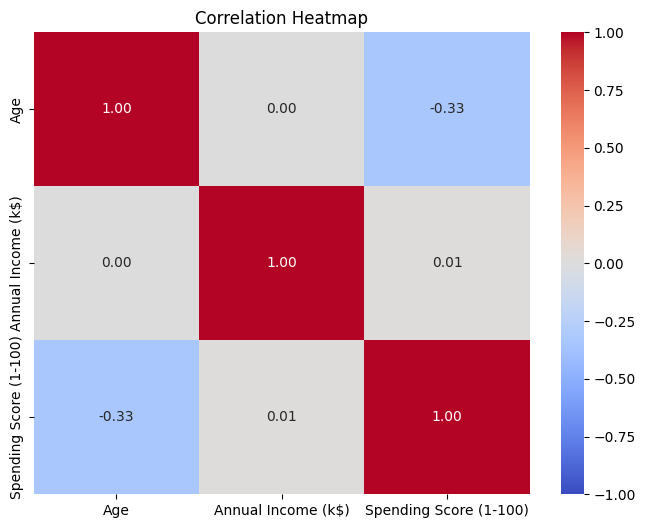

In [10]:
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})



correlation = df[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Genre
0    112
1     86
Name: count, dtype: int64


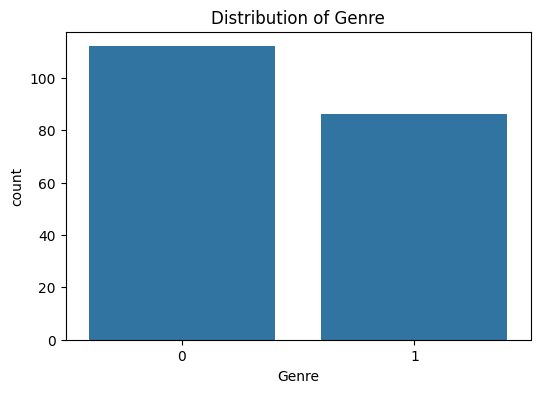

In [11]:

genre_distribution = df['Genre'].value_counts()
print(genre_distribution)


plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=df)
plt.title('Distribution of Genre')
plt.show()


In [12]:
# Printing value counts for numeric variables
print("Value Counts for Age:")
print(df['Age'].value_counts().sort_index())

print("\nValue Counts for Annual Income (k$):")
print(df['Annual Income (k$)'].value_counts().sort_index())

print("\nValue Counts for Spending Score (1-100):")
print(df['Spending Score (1-100)'].value_counts().sort_index())


Value Counts for Age:
Age
18     4
19     8
20     5
21     5
22     3
23     6
24     4
25     3
26     2
27     6
28     4
29     5
30     6
31     8
32    10
33     3
34     5
35     9
36     6
37     3
38     6
39     3
40     6
41     2
42     2
43     3
44     2
45     3
46     3
47     6
48     5
49     7
50     5
51     2
52     2
53     2
54     4
55     1
56     1
57     2
58     2
59     4
60     3
63     2
64     1
65     2
66     2
67     4
68     3
69     1
70     2
Name: count, dtype: int64

Value Counts for Annual Income (k$):
Annual Income (k$)
15     2
16     2
17     2
18     2
19     4
      ..
101    2
103    4
113    2
120    2
126    2
Name: count, Length: 63, dtype: int64

Value Counts for Spending Score (1-100):
Spending Score (1-100)
1     2
3     1
4     2
5     4
6     2
     ..
94    1
95    2
97    2
98    1
99    1
Name: count, Length: 83, dtype: int64


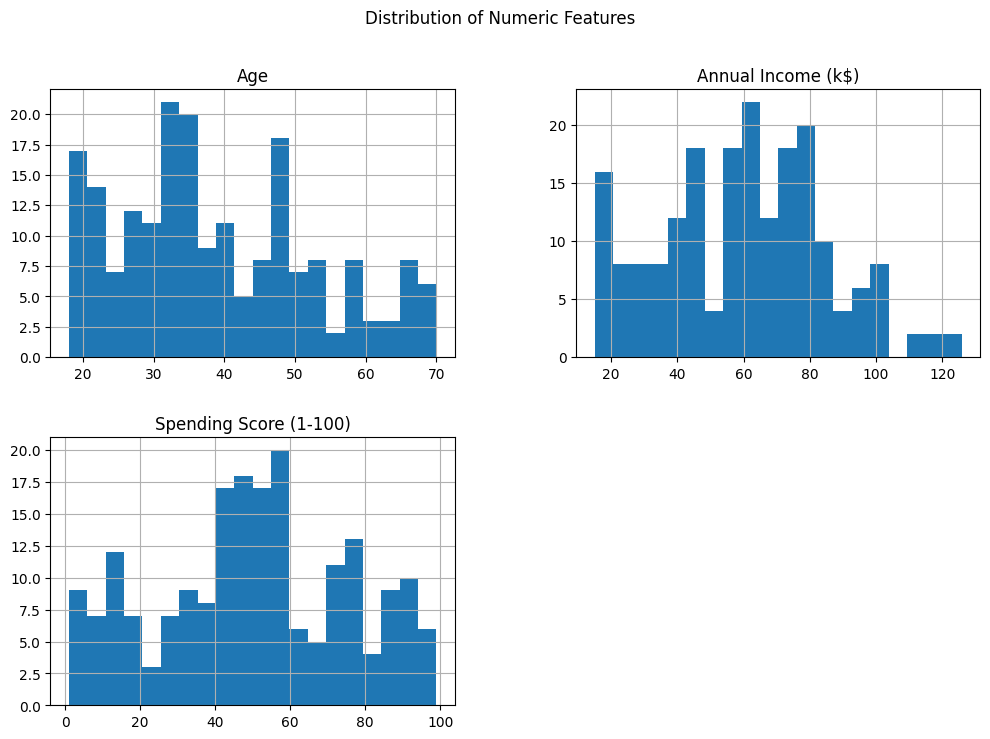

In [13]:

df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numeric Features')
plt.show()


In [14]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_outlier,Annual Income (k$)_outlier,Spending Score (1-100)_outlier
0,1,1,19,15,39,False,False,False
1,2,1,21,15,81,False,False,False
2,3,0,20,16,6,False,False,False
3,4,0,23,16,77,False,False,False
4,5,0,31,17,40,False,False,False
...,...,...,...,...,...,...,...,...
193,194,0,38,113,91,False,False,False
194,195,0,47,120,16,False,False,False
195,196,0,35,120,79,False,False,False
196,197,0,45,126,28,False,False,False


In [15]:
df_cleaned = df.drop(columns=[ 'Age_outlier', 'Annual Income (k$)_outlier', 'Spending Score (1-100)_outlier'])

print(df_cleaned.head())

   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40


In [16]:
from sklearn.preprocessing import StandardScaler
df=df_cleaned

columns_to_standardize = ['Annual Income (k$)', 'Spending Score (1-100)']


scaler = StandardScaler()


df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,-1.779171,-0.435989
1,2,1,21,-1.779171,1.199413
2,3,0,20,-1.739447,-1.720949
3,4,0,23,-1.739447,1.043661
4,5,0,31,-1.699723,-0.397051
...,...,...,...,...,...
193,194,0,38,2.113819,1.588795
194,195,0,47,2.391890,-1.331567
195,196,0,35,2.391890,1.121537
196,197,0,45,2.630236,-0.864309


In [54]:

from sklearn.cluster import KMeans


df_cluster = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Define the range of clusters to test
range_of_clusters = range(1, 11)
wcss = []

for n_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

In [57]:
wcss = np.array(wcss)
delta_wcss = np.diff(wcss)
delta_delta_wcss = np.diff(delta_wcss)


optimal_k_index = np.argmax(delta_delta_wcss) + 4
optimal_k = optimal_k_index

In [68]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(df_cluster)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [73]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_cluster[['Annual Income (k$)', 'Spending Score (1-100)']], df_cluster['Cluster'])
print(f"Silhouette Score for k=5: {silhouette_avg}")

Silhouette Score for k=5: 0.5586172665262851


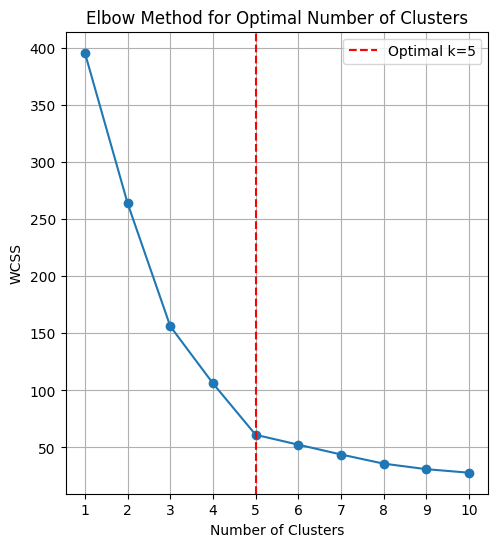

In [70]:
plt.figure(figsize=(12, 6))

# Elbow Curve
plt.subplot(1, 2, 1)
plt.plot(range_of_clusters, wcss, marker='o')
plt.axvline(x=optimal_k_index, color='red', linestyle='--', label=f'Optimal k={optimal_k_index}')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range_of_clusters)
plt.legend()
plt.grid(True)

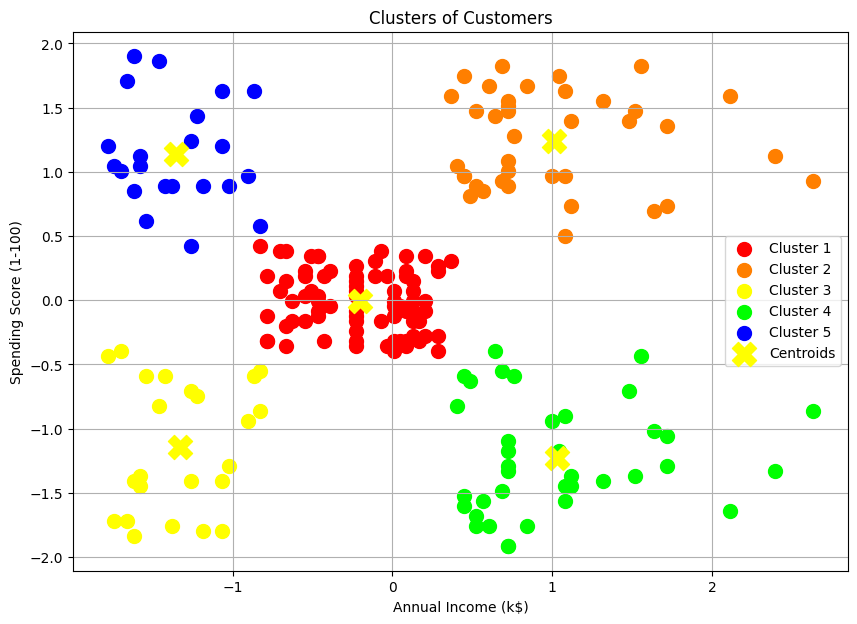

In [81]:
plt.figure(figsize=(10, 7))

colors = ['#ff0000', '#ff7f00', '#ffff00', '#00ff00', '#0000ff',
          '#4b0082', '#8b00ff']



for i in range(5):
    plt.scatter(df_cluster[y_predict == i]['Annual Income (k$)'],
                df_cluster[y_predict == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()